In [1]:
import sys
print(sys.version)

3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]


In [2]:
import os

# Specify the new directory path you want to change to
new_directory_path = '/Users/edwinhsu'

# Change the current working directory
os.chdir(new_directory_path)

# Verify the change
print("Current Working Directory:", os.getcwd())


Current Working Directory: /Users/edwinhsu


In [3]:
import os
import time
import math
import re
from pprint import pprint
from textblob import TextBlob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import nltk as nltk
from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer
import spacy
import multiprocessing
import string


import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# import pyLDAvis.gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [4]:
import pandas as pd
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import re
import sys
import numpy as np
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score
from itertools import combinations
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk import ngrams
from spacy.lang.en.stop_words import STOP_WORDS
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from pandarallel import pandarallel
import multiprocessing
# Initialize pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [5]:
from multiprocessing import cpu_count

print(cpu_count())

10


In [6]:
import time

start_time = time.time()

# Place your multicore processing code here

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


Execution time: 1.6927719116210938e-05 seconds


In [7]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

In [8]:
from pandarallel import pandarallel
import multiprocessing
num_cores = multiprocessing.cpu_count()
print(f"You have {num_cores} cores.")# Initialize pandarallel to use num_cores - 1
pandarallel.initialize(nb_workers=num_cores-1,progress_bar=True)

You have 10 cores.
INFO: Pandarallel will run on 9 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


#### Read tweets data

In [9]:
tweets_path = 'https://storage.googleapis.com/msca-bdp-data-open/tweets/nlp_a_6_tweets.json'
tweets_df = pd.read_json(tweets_path, orient='records', lines=True)
print(f'Sample contains {tweets_df.shape[0]:,.0f} tweets')
tweets_df.head(2)

Sample contains 9,941 tweets


,id,lang,date,name,retweeted,text
0,1484553027222741001,en,2022-01-21,Dylan Green,RT,*Microsoft has entered the chat* https://t.co/Uz3pZrk6B3
1,1505486305102557184,en,2022-03-20,Rahim Rajwani,,"""I actually use an @Android phone. Some #Android manufacturers pre-install @Microsoft software in a way that makes it easy for me. They’re more flexible about how the software connects up with the OS. So that’s what I ended up getting used to.""\nhttps://t.co/C0VjfS9PUO"


In [10]:
#nltk.download('stopwords')

#spacy.cli.download("en_core_web_sm")
#spacy.cli.download("en_core_web_md")
#spacy.cli.download("en_core_web_lg")
#spacy.cli.download("en_core_web_trf")

In [11]:
import warnings

# warnings.simplefilter('once')
warnings.simplefilter('ignore')
# warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

In [12]:
num_processors = multiprocessing.cpu_count()
num_processors

workers = num_processors-1

print(f'Using {workers} workers')

Using 9 workers


In [13]:
%%time
import pandas as pd
import spacy
import re
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess

# Load the spaCy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
stop_words = set(stopwords.words('english'))
# Preprocessing function
def preprocess_text(text):

    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove new lines and lower case
    text = text.replace('\n', ' ').lower()
    
    # Remove punctuation and stop words
    tokens = simple_preprocess(text, deacc=True)  # Deacc=True removes punctuations
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens))]
    
    return lemmatized_tokens

# Apply preprocessing to the 'text' column
tweets_df['processed_text'] = tweets_df['text'].parallel_apply(preprocess_text)

CPU times: user 675 ms, sys: 142 ms, total: 816 ms
Wall time: 4.6 s


In [14]:
tweets_df

,id,lang,date,name,retweeted,text,processed_text
0,1484553027222741001,en,2022-01-21,Dylan Green,RT,*Microsoft has entered the chat* https://t.co/Uz3pZrk6B3,"[microsoft, enter, chat]"
1,1505486305102557184,en,2022-03-20,Rahim Rajwani,,"""I actually use an @Android phone. Some #Android manufacturers pre-install @Microsoft software in a way that makes it easy for me. They’re more flexible about how the software connects up with the OS. So that’s what I ended up getting used to.""\nhttps://t.co/C0VjfS9PUO","[actually, use, phone, manufacturer, pre, install, software, way, make, easy, flexible, software, connect, os, end, get, use]"
2,1534423029077401600,en,2022-06-08,zobjobs - US Remote Jobs,,Need Help With Data Entry | Microsoft Word | Visual Assistant &amp; Cleanup\nat Upwork\nThe Data Entry Specialist is responsible for upd...\n#DataEntry #workfromanywhere \nhttps://t.co/xuslPNLhvU,"[need, help, data, entry, microsoft, word, visual, assistant, amp, cleanup, upwork, datum, entry, specialist, responsible, upd]"
3,1505488514867032071,en,2022-03-20,GrannyPink,RT,@Concentrix @Microsoft This Bryan Jay claims to be your employee. He has threatened to throw a bomb at the crowd in Pasig. @pnppio @Meta @DILGPhilippines Time to take action. https://t.co/Opk8B7dgsC,"[bryan, jay, claim, employee, threaten, throw, bomb, crowd, pasig, time, take, action]"
4,1534860135159726081,en,2022-06-09,summer,RT,"Tags; netflix viu youtube iflix hbo max hbo go disney plus iwant iqyi amazon crunchyroll shudder spotify tidal napster apple music pandora grammarly canva quillbot bartleby microsoft 365 quizlet scribd zoom pro skillshare zookal prezi coursehero picsart and many more, just dm me! https://t.co/qnJ2uwnaMh","[tag, netflix, viu, youtube, iflix, hbo, max, hbo, go, disney, plus, iwant, iqyi, amazon, crunchyroll, shudder, spotify, tidal, napster, apple, music, pandora, grammarly, canva, quillbot, bartleby, microsoft, quizlet, scribd, zoom, pro, skillshare, zookal, prezi, coursehero, picsart, many, dm]"
...,...,...,...,...,...,...,...
9936,1558005922760650753,en,2022-08-12,satria,RT,"Hello Data Analyst,\n\nHave you tried MSPTDA (Microsoft Power Tools and Data Analysis)?\n\nThe link below gives you free access to the beginner to advanced data analysis &amp; BI class. \n\nLearn about Power Query, Power Pivot, DAX, M Code, Power BI &amp; Excel (about 81 videos). 1/2","[hello, data, analyst, try, msptda, microsoft, power, tool, datum, analysis, link, give, free, access, beginner, advanced, datum, analysis, amp, bi, class, learn, power, query, power, pivot, dax, code, power, bi, amp, excel, video]"
9937,1556034674186649608,en,2022-08-06,Prince Tybalt,,"@ethanmaqe for any would be suitors, be it Sony, Tencent, Microsoft or whoever. It'll be about what brands like Final Fantasy, Kingdom Hearts &amp; Dragons Quest can do for them &amp; their respective businesses. That's the reality of the industry right now. I'd prefer no more consolidation. 2/2","[would, suitor, sony, tencent, microsoft, whoever, brand, like, final, fantasy, kingdom, heart, amp, dragons, quest, amp, respective, business, reality, industry, right, prefer, consolidation]"
9938,1556888440062545920,en,2022-08-09,✨ TaiTai 👩‍💻 🇿🇦 ✨,RT,We’re excited to announce today that we’ve partnered with Microsoft to develop a cloud infrastructure to empower game developers and 3D artists everywhere with the power of Azure. Learn more about this partnership. https://t.co/HohHo1joFg,"[excite, announce, today, partner, microsoft, develop, cloud, infrastructure, empower, game, developer, artist, everywhere, power, azure, learn, partnership]"
9939,1556224151039356929,en,2022-08-07,N. L. Perry,,Full text: Microsoft’s multi-cloud vision would keep Amazon from running away with federal deals https://t.co/71lzwiwTGt https://t.co/DcpIV6GTIq,"[full, text, microsoft, multi, cloud, vision, would, keep, amazon, run, away, federal, deal]"


In [15]:
%%time
from gensim import corpora, models

# Prepare the dictionary and corpus
texts = tweets_df['processed_text'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA Model
NUM_TOPICS = 5  # Initial guess, adjust based on coherence
lda_model = models.LdaMulticore(corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=10, workers=workers)

# Display the topics
topics = lda_model.show_topics(formatted=True)
for topic in topics:
    print(topic)

(0, '0.049*"microsoft" + 0.013*"use" + 0.011*"ceo" + 0.009*"know" + 0.008*"company" + 0.008*"buy" + 0.007*"activision" + 0.006*"business" + 0.006*"game" + 0.006*"people"')
(1, '0.036*"microsoft" + 0.016*"premium" + 0.013*"grammarly" + 0.012*"canva" + 0.012*"netflix" + 0.012*"spotify" + 0.011*"quillbot" + 0.011*"account" + 0.011*"year" + 0.010*"youtube"')
(2, '0.027*"microsoft" + 0.010*"stop" + 0.010*"get" + 0.009*"support" + 0.008*"good" + 0.007*"russia" + 0.006*"product" + 0.005*"make" + 0.005*"sale" + 0.005*"war"')
(3, '0.073*"microsoft" + 0.009*"game" + 0.009*"xbox" + 0.008*"like" + 0.007*"new" + 0.007*"amp" + 0.007*"get" + 0.006*"word" + 0.006*"use" + 0.006*"make"')
(4, '0.071*"ever" + 0.053*"microsoft" + 0.005*"window" + 0.005*"today" + 0.005*"apple" + 0.005*"xbox" + 0.004*"company" + 0.004*"office" + 0.004*"good" + 0.004*"sony"')
CPU times: user 3.38 s, sys: 387 ms, total: 3.77 s
Wall time: 9.44 s


In [16]:
%%time
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit + 1, step):
        model = models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=workers)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=15, step=1)

CPU times: user 49.5 s, sys: 6.94 s, total: 56.4 s
Wall time: 3min 12s


In [18]:
%%time
coherence_values

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 13.8 µs


[0.23142654418332553,
 0.318141378944861,
 0.2905791901402055,
 0.401662183211564,
 0.32018473225679495,
 0.37532075605024656,
 0.3846800627941928,
 0.3850747521376644,
 0.33272069011182337,
 0.37742159510997425,
 0.3620146622070928,
 0.38089953432664997,
 0.3896736725637772,
 0.3667323309546308]

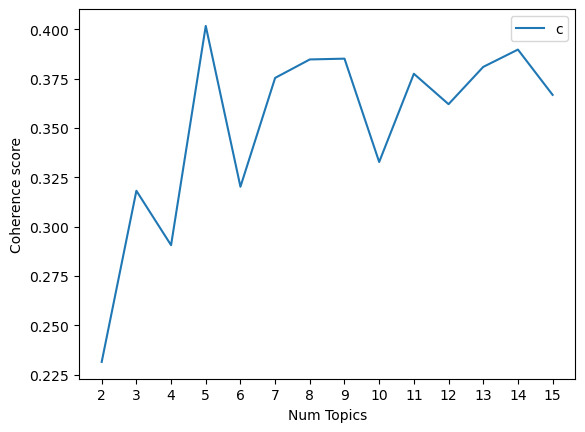

(0, '0.056*"microsoft" + 0.050*"ever" + 0.010*"number" + 0.010*"window" + 0.009*"year" + 0.009*"own" + 0.008*"word" + 0.007*"use" + 0.006*"know" + 0.006*"activision"')
(1, '0.037*"microsoft" + 0.017*"ceo" + 0.013*"premium" + 0.010*"netflix" + 0.010*"grammarly" + 0.010*"apple" + 0.010*"canva" + 0.009*"spotify" + 0.009*"account" + 0.009*"quillbot"')
(2, '0.063*"microsoft" + 0.016*"use" + 0.011*"new" + 0.010*"excel" + 0.009*"know" + 0.008*"work" + 0.006*"business" + 0.006*"today" + 0.005*"learn" + 0.005*"xbox"')
(3, '0.047*"microsoft" + 0.018*"amp" + 0.006*"get" + 0.006*"one" + 0.006*"power" + 0.005*"time" + 0.005*"team" + 0.005*"like" + 0.005*"free" + 0.005*"take"')
(4, '0.065*"microsoft" + 0.015*"game" + 0.011*"buy" + 0.010*"xbox" + 0.009*"sony" + 0.009*"billion" + 0.009*"like" + 0.008*"google" + 0.008*"company" + 0.008*"activision"')
CPU times: user 165 ms, sys: 463 ms, total: 628 ms
Wall time: 107 ms


In [25]:
%%time
# Plotting
import matplotlib.pyplot as plt
import numpy as np

x = range(2, 16)  # Assuming you've computed coherence values for these numbers of topics
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))  # Setting x-ticks to show every integer in the range
plt.legend(("coherence_values"), loc='best')
plt.show()

# Select the model with the highest coherence and print its topics
optimal_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_index]
optimal_topics = optimal_model.show_topics(formatted=True)
for topic in optimal_topics:
    print(topic)

The optimal N was selected based on the coherence score, which measures the degree of semantic similarity between high scoring words in each topic. A higher coherence score generally indicates the topics are more interpretable and meaningful. The goal is to choose N that ensures topics are distinct and informative, minimizing overlap while capturing the diversity of the discussion around the company in the tweets.

By visually inspecting the plot of coherence scores against the number of topics, we can identify a point where increasing the number of topics does not significantly improve the coherence score, or the score might even start to decline. This point is often a good choice for N, balancing topic quality with manageability.

Topic 0: Microsoft's Software and Corporate Achievements
Keywords: microsoft, ever, number, window, year, own, word, use, know, activision

Topic 1: Microsoft in the Tech Ecosystem
Keywords: microsoft, ceo, premium, netflix, grammarly, apple, canva, spotify, account, quillbot

Topic 2: Microsoft's Products and Services
Keywords: microsoft, use, new, excel, know, work, business, today, learn, xbox

Topic 3: Microsoft's Community and Engagement
Keywords: microsoft, amp, get, one, power, time, team, like, free, take

Topic 4: Microsoft and the Gaming Industry
Keywords: microsoft, game, buy, xbox, sony, billion, like, google, company, activision
